In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rn
import seaborn as sns

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/home/otavio/ml/datasets/aviation/accidents.csv')
data19 = pd.read_csv('/home/otavio/ml/datasets/aviation/accidents2019.csv')
data20 = pd.read_csv('/home/otavio/ml/datasets/aviation/accidents2020.csv')

In [3]:
# data = pd.concat([data, data19, data20])
data.head(40)

,Date,StateOfOccurrence,Location,Model,Registration,Operator,StateOfOperator,StateOfRegistry,FlightPhase,Class,...,InjuryLevel,TypeDesignator,Helicopter,Airplane,Engines,EngineType,Official,OccCats,Risk,Year
0,"""2017-04-01T00:00:00.000Z""",NGA,Yei Airport,Let L-410,5X-EIV,Eagle Air,NGA,UGA,Take-off,Accident,...,None,L200,NaN,True,2,Piston,True,"[""RE""]",RS,2017
1,"""2010-08-20T00:00:00.000Z""",NGA,NaN,Boeing 737 (JT8D),5N-BIF,Chanchangi Airlines,NGA,NGA,Approach,Accident,...,None,B37M,NaN,True,2,Jet,True,[],RS,2010
2,"""2011-07-12T00:00:00.000Z""",TZA,Julius Nyeres Int. A/P,BOEING 737,5Y-KQH,Kenya Kenya Airways Ltd.,KEN,KEN,Taxi,Accident,...,None,B37M,NaN,True,2,Jet,True,"[""GCOL""]",RS,2011
3,"""2012-06-03T00:00:00.000Z""",NGA,"IJU ISHAGA, LAGOS",MD 83,5N-RAM,Nepal,NGA,NGA,Approach,Accident,...,Fatal,SW3,NaN,True,2,Turboprop,True,[],UNK,2012
4,"""2011-02-14T00:00:00.000Z""",COD,Mont Biega,LET L410 UVPE,9Q-CIF,African Air Service Commuter,COD,COD,En route,Accident,...,Fatal,L410,NaN,True,2,Turboprop,True,"[""CFIT""]",CFIT,2011
5,"""2008-04-15T00:00:00.000Z""",COD,Goma,MCDONNELL DOUGLASDC-9-50,9Q-CHN,"Congo, The Democratic Republic Of",COD,COD,Take-off,Accident,...,Fatal,HAWK,NaN,True,1,Jet,True,"[""RE"",""SCF-PP""]",RS,2008
6,"""2015-11-01T00:00:00.000Z""",COD,Kinshasa - N'Djili,Gulfstream 159,9Q-CND,"Congo, The Democratic Republic Of",COD,COD,NaN,Accident,...,NaN,G159,NaN,True,2,Turboprop,True,"[""TURB"",""ARC"",""SCF-NP""]",TURB,2015
7,"""2019-01-18T00:00:00.000Z""",AUS,enroute,Boeing 777-200,9V-SQL,Singapore Airlines (SIA),SGP,SGP,NaN,Accident,...,Minor,B37M,False,True,2,Jet,NaN,"[""MED""]",OTH,2019
8,"""2012-04-22T00:00:00.000Z""",PAK,Karachi,BOEING 737,AP-BJN,Pakistan Shaheen Air International,PAK,PAK,Landing,Accident,...,None,B37M,NaN,True,2,Jet,True,"[""SCF-NP""]",SCF,2012
9,"""2020-05-22T00:00:00.000Z""",PAK,Karachi,Airbus A320,AP-BLD,Pakistan International Airlines,PAK,PAK,Approach,Accident,...,None,A320,False,True,2,Jet,NaN,[],RS,2020


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 1273 non-null   object 
 1   StateOfOccurrence    1262 non-null   object 
 2   Location             1137 non-null   object 
 3   Model                1273 non-null   object 
 4   Registration         1273 non-null   object 
 5   Operator             1195 non-null   object 
 6   StateOfOperator      1195 non-null   object 
 7   StateOfRegistry      1273 non-null   object 
 8   FlightPhase          1106 non-null   object 
 9   Class                1273 non-null   object 
 10  Fatalities           900 non-null    float64
 11  Over2250             1273 non-null   bool   
 12  Over5700             1273 non-null   bool   
 13  ScheduledCommercial  1273 non-null   bool   
 14  InjuryLevel          1098 non-null   object 
 15  TypeDesignator       1273 non-null   o

In [5]:
planes = data.loc[(data['Airplane'] == True)]

In [6]:
planes['Year'] = 0
planes.loc[:, 'Year'] = planes['Date'].apply(lambda x: x.split('-')[0].replace('"', ''))
# planes['Year'] = planes.loc[:, 'Date'].apply(lambda x: x.split('-')[0].replace('"', ''))
planes['Year'].head(40)

0     2017
1     2010
2     2011
3     2012
4     2011
5     2008
6     2015
7     2019
8     2012
9     2020
10    2019
11    2010
12    2010
13    2018
14    2019
15    2017
16    2014
17    2019
18    2012
19    2009
20    2009
21    2014
22    2009
23    2012
24    2015
25    2012
26    2008
27    2013
28    2014
29    2013
30    2011
31    2015
32    2008
33    2010
34    2018
35    2010
36    2019
37    2014
38    2011
39    2015
Name: Year, dtype: object

In [7]:
year = {'2008': 26.5, '2009': 25.9, '2010': 27.8, '2011': 30.1, '2012': 31.2, '2013': 32, '2014': 33, '2015': 34, '2016': 35.2, '2017': 36.4, '2018': 38.1, '2019': 39}


In [8]:
count = planes.groupby('Year')['Date'].count().to_frame().reset_index()[:-1]
count['rate'] = count['Date'] / count['Year'].map(year)
deaths = planes.groupby('Year')['Fatalities'].sum().to_frame().reset_index()[:-1]
deaths['rate'] = deaths['Fatalities'] / deaths['Year'].map(year)
deaths['Fatalities'] = deaths['Fatalities'].apply(lambda x: int(x))
deaths

,Year,Fatalities,rate
0,2008,523,19.735849
1,2009,695,26.833977
2,2010,768,27.625899
3,2011,422,14.019934
4,2012,386,12.371795
5,2013,173,5.406250
6,2014,911,27.606061
7,2015,474,13.941176
8,2016,182,5.170455
9,2017,50,1.373626


In [24]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size=25)

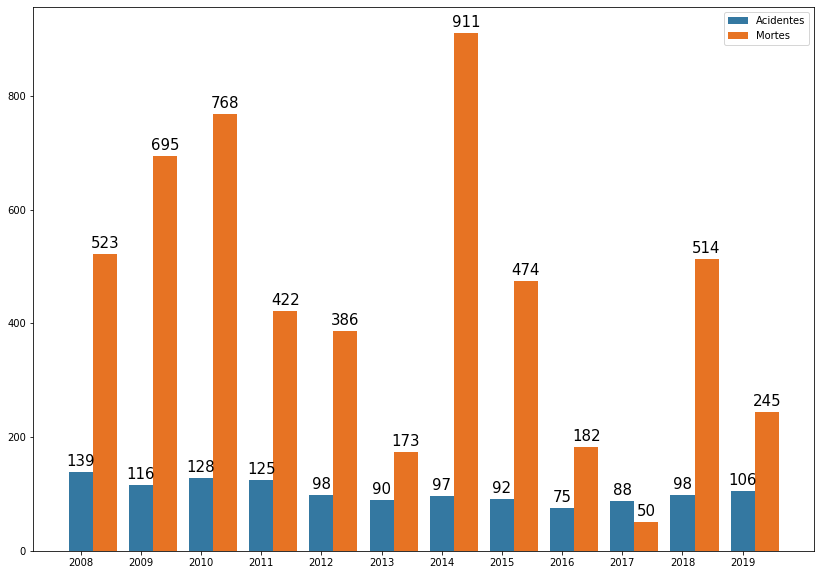

In [10]:
labels = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars
fig, ax = plt.subplots(figsize=(14, 10))
bar = plt.bar(x - width/2, count['Date'], width, color='#3478a1', align='edge', label='Acidentes')
bar2 = plt.bar(x + width/2, deaths['Fatalities'], width, color='#e77323', align='edge', label='Mortes')

ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(labels)
autolabel(bar)
autolabel(bar2)

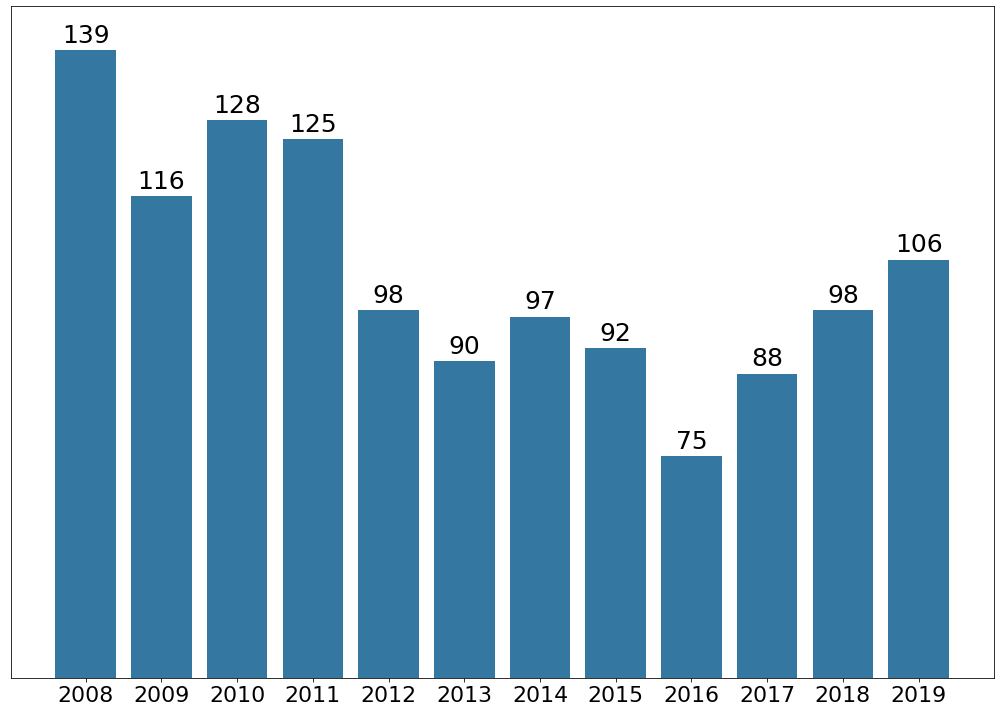

In [25]:
fig, ax = plt.subplots(figsize=(14, 10))
bar = plt.bar(count['Year'], count['Date'], color='#3478a1')
plt.xticks(size=22)
plt.yticks([])
ax.set_ylim(ymin=40)
autolabel(bar)
plt.tight_layout()
plt.savefig('count.png')

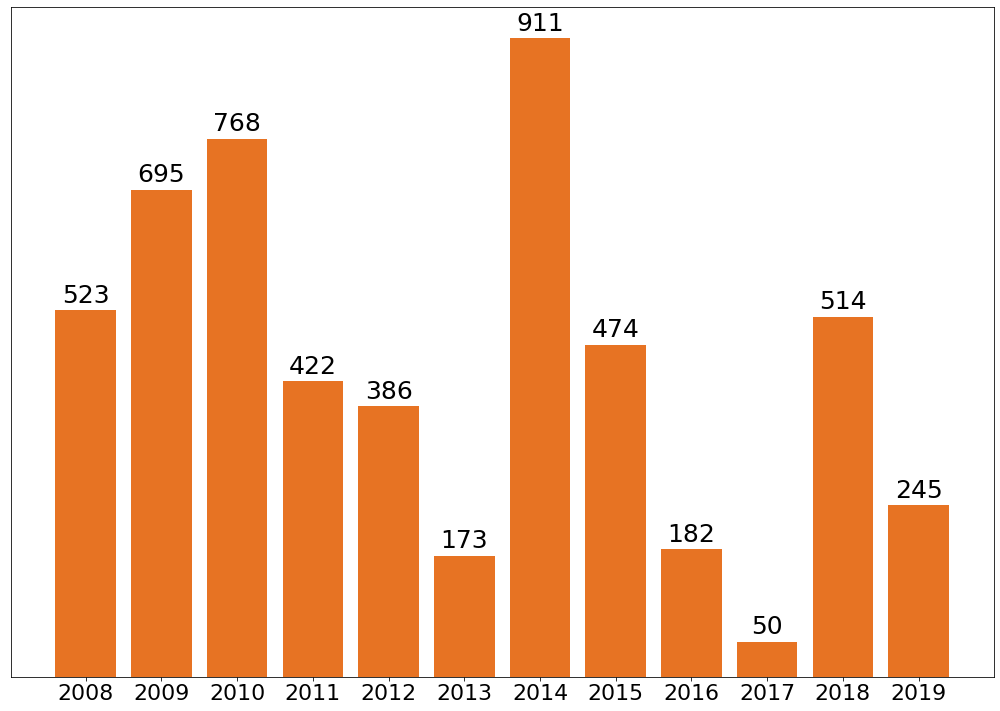

In [26]:
fig, ax = plt.subplots(figsize=(14, 10))
bar = plt.bar(deaths['Year'], deaths['Fatalities'], color='#e77323')
autolabel(bar)
plt.xticks(size=22)
plt.yticks([])
plt.tight_layout()

plt.savefig('death.png')

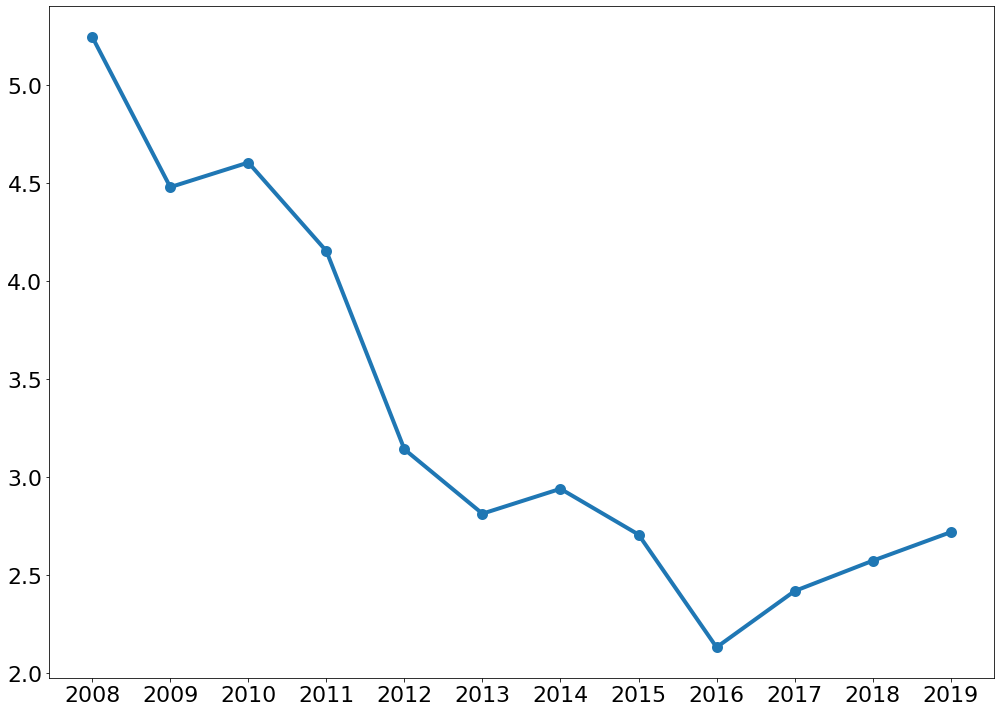

In [32]:
fig, ax = plt.subplots(figsize=(14, 10))
plt.plot(count['Year'], count['rate'], marker='o', linewidth=4, mew=5)
plt.xticks(size=22)
plt.yticks(size=22)
plt.tight_layout()
plt.savefig('rate.png')

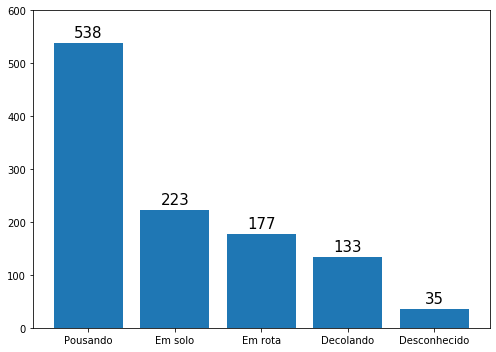

In [21]:
df = pd.DataFrame({'Fase': ['Pousando', 'Em rota', 'Em solo', 'Decolando', 'Desconhecido'], 
                   'Qtd':[538, 177, 223, 133, 35]})
df.sort_values('Qtd', ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(7, 5))
bar = plt.bar(df['Fase'], df['Qtd'])
plt.yticks([0, 100, 200, 300, 400, 500, 600])
autolabel(bar)
plt.tight_layout()

plt.savefig('type.png')

In [15]:
data['Model'].value_counts()

Boeing 737          60
BOEING 737          35
Airbus A320         32
BOEING 737 800      28
AIRBUS A320         22
                    ..
DHC8-300             1
Boeing 737-400       1
Airbus A340-300      1
TRANSALL C160        1
Airbus A321-271N     1
Name: Model, Length: 437, dtype: int64